# Project: Investigate a No Show Medical Appointments Dataset


## Table of Contents

1. Introduction
2. Initial Data Analysis
3. Data Wrangling
4. Exploratory Data Analysis
5. Conclusions


## 1.Introduction
The given data set comprises of collection of 100k records of Medical appointments in Brazil and is focused on question whether the Patients turned up to hospital against their appointment or not . I am going to investigate what Factors are contributing for the Patients to show up at Hospital against their scheduled appointment.

In [255]:
#load Data
import os
os.chdir(r"C:\Users\Anok\Downloads\Udacity Assignment 2-no show appointments")
os.getcwd()

'C:\\Users\\Anok\\Downloads\\Udacity Assignment 2-no show appointments'

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [257]:
import pandas as pd
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

### Initial Data Analysis

In [258]:
df.shape

(110527, 14)

In [259]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [260]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [262]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Dataset Description:
The given data set comprises of 110527 records with 14 variables , of them 13 being Independent Variables and 1 Variable being dependant variable (No-show).
1. Patient id is the id of Patient which is supposed to be Integer but has been in the form of float.
2. Appointment is the id number of Appointment which is in the form of Integer.
3. Gender letting know whether the patient is M/F.
4. Scheduled day tells us on what day the patient set up their appointment
5. Appointment day is the day for which appointment is being made for the patient to visit Hospital
6. Age lets us know age of Patient .
7. Neighborhood being indicating location of Hospital
7. Scholarship indicates whether Patient being on welfare program , [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) or not.
8. Hypertension indicates whether Patient has got Hypertension or not.
9. Diabtes indicates whether the Patient has got Diabetes or not.
10. Alcoholism indicates whether the Patient consumes alcohol or not.
11. Handicap lets us know whether the Patient is Handicap or not.
12. SMS_received is messages sent to patient regarding their appointment
13. No-show being Yes or no(it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.)

# Data Wrangling
### Clean Data from Missing Values and Duplicates

In [263]:
#missing Values
df.isnull().sum().sum() , df.isnull().sum()

(0,
 PatientId         0
 AppointmentID     0
 Gender            0
 ScheduledDay      0
 AppointmentDay    0
 Age               0
 Neighbourhood     0
 Scholarship       0
 Hipertension      0
 Diabetes          0
 Alcoholism        0
 Handcap           0
 SMS_received      0
 No-show           0
 dtype: int64)

In [264]:
#Duplicate Value filtering
sum(df.duplicated())

0

## The data set does not contain any Missing values or Duplicates .

#### Renaming columns such that typos and unwanted spaces will be removed and brough to same format

In [265]:
#renaming columns
new_columns=['patient_id','appointment_id','gender','scheduled_day',
            'appointment_day','age','neighborhood','scholarship',
            'hypertension','diabetes','alcoholism','handicap','sms_received','no_show']

In [266]:
df.columns=new_columns
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [267]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Changing Variable Type

As we are not going to use patient_id in Arithmetic Operations , We shall convert it into String.

In [268]:
## Converting the values to int type and then to str type:
df['patient_id'] = df['patient_id'].apply(lambda x: str(int(x)));

In [269]:
df.patient_id.nunique()

62299

The no of Patients in our data set is 62299 which means that many of the Patients have got appointment more than 1 time.The total no of records being 110527

In [270]:
print("The average number of appointments per patient is {}".format(110527/62299))

The average number of appointments per patient is 1.7741376266071687


In [271]:
#reformatting date in scheduled_date
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')

In [272]:
df.scheduled_day.head(5)

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: scheduled_day, dtype: datetime64[ns]

In [273]:
#reformatting date in appointment date
df.appointment_day = pd.to_datetime(df.appointment_day).dt.date.astype('datetime64[ns]')

In [274]:
df.appointment_day.head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: appointment_day, dtype: datetime64[ns]

### Let us add a new column "Wait_days" which is number of days a patient had to wait for appointment date from scheduled date

In [275]:
df['wait_days'] = (df.appointment_day - df.scheduled_day).dt.days

In [276]:
df.wait_days.head(10)

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    2
8    0
9    2
Name: wait_days, dtype: int64

In [277]:
df.wait_days.nunique()

131

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  object        
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighborhood     110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
 14  wait_days        110

In [279]:
df.describe()

,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,wait_days
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [280]:
#let us convert appointment id too into string
df['appointment_id'] = df['appointment_id'].apply(lambda x: str(int(x)));

In [281]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,wait_days
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [282]:
#wait days shows minimum value as negative , so there are negative values in the created Feature.
#let us work upon that issue further
#the reason for negative values might be that the scheduled day updated after appointment day

In [283]:
#create a data frame by dropping negative wait days values
days_between_df = df.drop(df.index[df['wait_days'] < 0])

In [284]:
days_between_df.shape

(110522, 15)

In [285]:
df.shape

(110527, 15)

In [286]:
print("The number of records which are having negative wait days are {}".format(110527-110522))

The number of records which are having negative wait days are 5


let us drop negative wait days from our main data frame df too as 5 records wouldnot much impact our analysis comprising of 100527 records

In [287]:
#let us drop those negative values from df too
df = df.drop(df.index[df['wait_days']<0])

In [288]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,wait_days
count,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,10.184253
std,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15.255115
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


## check for erroneous data

In [289]:
print(sorted(df['age'].unique()),end=' ')

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115] 

In [290]:
print("Total number of Unique Values in scholarship are {} ".format(df.scholarship.unique()))


Total number of Unique Values in scholarship are [0 1] 


In [291]:
print("Total number of Unique Values in hypertension are {} ".format(df.hypertension.unique()))

Total number of Unique Values in hypertension are [1 0] 


In [292]:
print("Total number of Unique Values in diabetes are {} ".format(df.diabetes.unique()))


Total number of Unique Values in diabetes are [0 1] 


In [293]:
print("Total number of Unique Values in alcoholism are {} ".format(df.alcoholism.unique()))

Total number of Unique Values in alcoholism are [0 1] 


In [294]:
print("Total number of Unique Values in handicap are {} ".format(df.handicap.unique()))


Total number of Unique Values in handicap are [0 1 2 3 4] 


In [295]:
print("Total number of Unique Values in sms_received are {} ".format(df.sms_received.unique()))


Total number of Unique Values in sms_received are [0 1] 


In [296]:
print("Total number of Unique Values in no_show are {} ".format(df.no_show.unique()))

Total number of Unique Values in no_show are ['No' 'Yes'] 


In [297]:
#removing Outliers in Age
df = df.drop(df.index[df['age']<=0])

In [298]:
df.age.describe()

count    106982.000000
mean         38.316315
std          22.466023
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [299]:
df = df.drop(df.index[df['age']>=100])

In [300]:
df.age.describe()

count    106971.000000
mean         38.309233
std          22.456204
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          99.000000
Name: age, dtype: float64

In [301]:
df=df.drop(df.index[df['age']>=100])

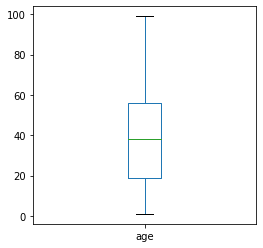

In [302]:
df.age.plot(kind='box',figsize=(4,4))

In [303]:
#I will save the cleaned data in to CSV file 
df.to_csv("no_show_cleaned.csv",index=False)

## 4. Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4B6CA83C8>,
      dtype=object)

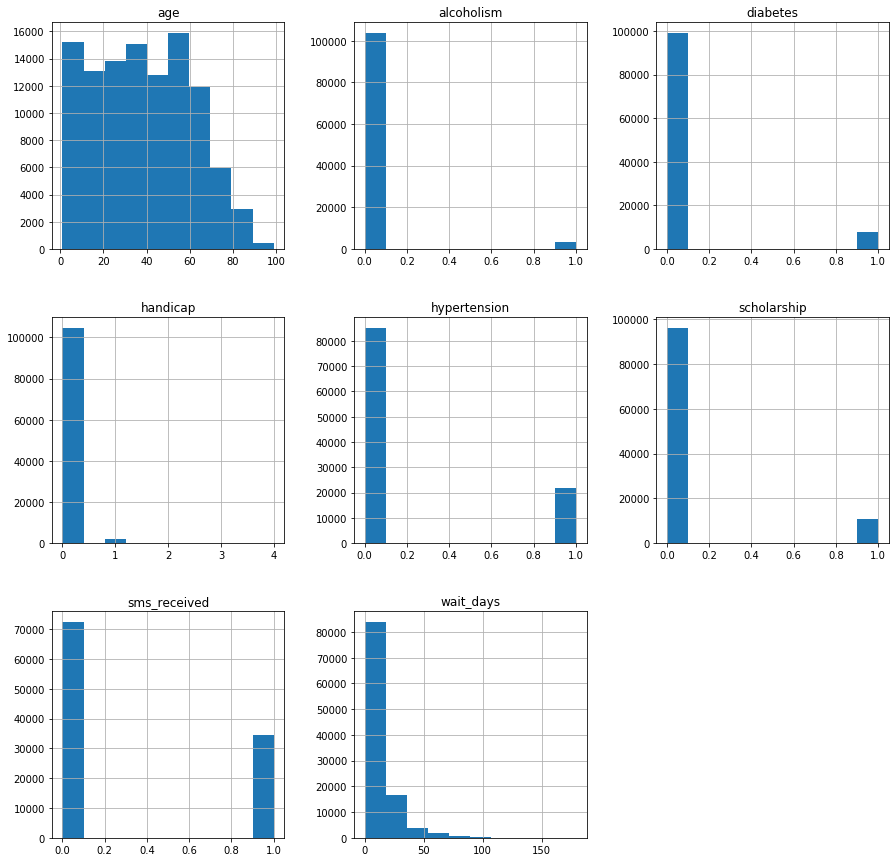

In [304]:
df.hist(figsize=(15,15))

In [305]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,wait_days
count,106971.000000,106971.000000,106971.000000,106971.000000,106971.000000,106971.000000,106971.000000,106971.000000
mean,38.309233,0.101046,0.203794,0.074254,0.031410,0.022903,0.323293,10.167363
std,22.456204,0.301391,0.402819,0.262185,0.174425,0.163909,0.467736,15.263905
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


1. Age being a [discrete variable](https://www.quora.com/Is-ages-of-students-a-discrete-or-continuous-variable) in the data set , it tends to be right skewed and also that most of the data points are concentrated between 0 and 60 as per Histogram and Average Age being 38 with IQR being 37 .
2. All of the other Variables like Scholarship , Hyper tension , Diabetes , Alcoholism , Sms_received being Binary class Variables with answer being Yes or No whereas Handicap variable being a ordinal variable with 5 classes.
3. Wait days also got number ranging between 0 to 179 seems to be right skewed in Histogram.

### Questions to ask with the Data we have got are as follows.
1. Which Gender type has the highest number of no shows?
2. Which age groups are more likely to miss their appointment and not to turn up to hospital?
3. How likely are the patients to turn up as per their appointment if they are alcoholic, Diabetic,Handicap or suffering from Hypertension?
4. Which neighborhoods have a highest number of People making it as per their Appointment?
5. If the Patient is covered under Welfare aka Scholarship , how likely they are to miss their appointment?
6. How wait_days affecting No show up?
7. Does sending SMS to patient regarding Appointment makes Patient to make up to their appointment?

#### 1.Which Gender type has the highest number of no shows?


In [306]:
# Using Group by we shall calculate number of shows and No shows.
gender_count = df.groupby('gender').no_show.value_counts()
gender_count

gender  no_show
F       No         55837
        Yes        14269
M       No         29462
        Yes         7403
Name: no_show, dtype: int64

Text(0, 0.5, 'Number of appointments')

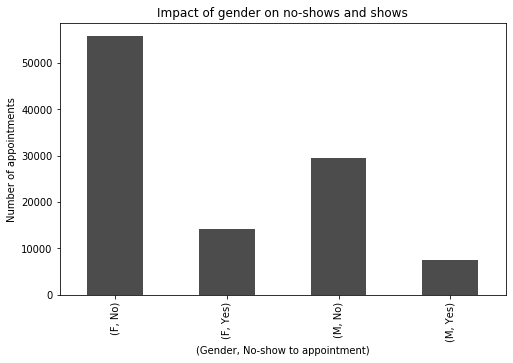

In [307]:
# plot the graph
gender_count.plot(kind='bar',figsize=(8,5),alpha=0.7,color='k');
plt.title('Impact of gender on no-shows and shows')
plt.xlabel('(Gender, No-show to appointment)')
plt.ylabel('Number of appointments')

from the above bar plot it can be noticed that Females who didnot miss appointment are above 50000 , while Females who missed appointment are nearly 12000 .For that of Males , it is nearly 30000 and 8000 respectively.

In [308]:
# Let us Calculate Percent of Females and Males who did show up or did not show up 
print("The Percentage of Females who did show up is : {}".format((gender_count['F']['No']/len(df.index)) * 100))
print("The Percentage of Males who did show up is : {}".format((gender_count['M']['No']/len(df.index)) * 100))
print("The Percentage of Females who did not show up is : {}".format((gender_count['F']['Yes']/len(df.index)) * 100))
print("The Percentage of Males who did not show up is : {}".format((gender_count['M']['Yes']/len(df.index)) * 100))
print("The number of Females in our data is : {}".format((55837+14269)))
print("The number of Males in our data is : {}".format((29462+7403)))

The Percentage of Females who did show up is : 52.19825934131681
The Percentage of Males who did show up is : 27.542044105411744
The Percentage of Females who did not show up is : 13.33912929672528
The Percentage of Males who did not show up is : 6.920567256546168
The number of Females in our data is : 70106
The number of Males in our data is : 36865


#### Inference: 
Our Data comprises more number of Females than that of Males and so the number of Females who showed up is high than that of Males and also that the number of Females who did not show up too is higher than that of Males. Gender doesnot have huge impact on whether showing up or not showing up.

#### 2.Which age groups are more likely to miss their appointment and not to turn up to hospital?

In [309]:
# creating age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['age_bins'] = pd.cut(df.age, age_bins)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,wait_days,age_bins
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,"(60, 70]"
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,"(50, 60]"
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,"(60, 70]"
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,"(0, 10]"
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,"(50, 60]"


In [310]:
# filter by no-shown appointments
no_shown_age_data = df.query('no_show == "Yes"').groupby('age_bins').no_show.value_counts()
no_shown_age_data

age_bins   no_show
(0, 10]    Yes        3148
(10, 20]   Yes        3307
(20, 30]   Yes        3393
(30, 40]   Yes        3231
(40, 50]   Yes        2870
(50, 60]   Yes        2721
(60, 70]   Yes        1648
(70, 80]   Yes         889
(80, 90]   Yes         406
(90, 100]  Yes          59
Name: no_show, dtype: int64

In [311]:
age_no_show_up = {}
for index in range(0,len(age_bins)-1):
    key = "({},{}]".format(age_bins[index], age_bins[index+1])
    value = no_shown_age_data.values[index]
    age_no_show_up.update({key: value})
age_no_show_up

{'(0,10]': 3148,
 '(10,20]': 3307,
 '(20,30]': 3393,
 '(30,40]': 3231,
 '(40,50]': 2870,
 '(50,60]': 2721,
 '(60,70]': 1648,
 '(70,80]': 889,
 '(80,90]': 406,
 '(90,100]': 59}

In [312]:
# calculate percentage by age_bins of no-shown
def print_no_show_up_age_percentage():
    total = len(df.index)
    for key, value in age_no_show_up.items():
        percent = (value/total) * 100
        print("{}% are in bin-{}".format(percent.round(2), key))
print_no_show_up_age_percentage()

2.94% are in bin-(0,10]
3.09% are in bin-(10,20]
3.17% are in bin-(20,30]
3.02% are in bin-(30,40]
2.68% are in bin-(40,50]
2.54% are in bin-(50,60]
1.54% are in bin-(60,70]
0.83% are in bin-(70,80]
0.38% are in bin-(80,90]
0.06% are in bin-(90,100]


Text(0, 0.5, 'Number of appointments')

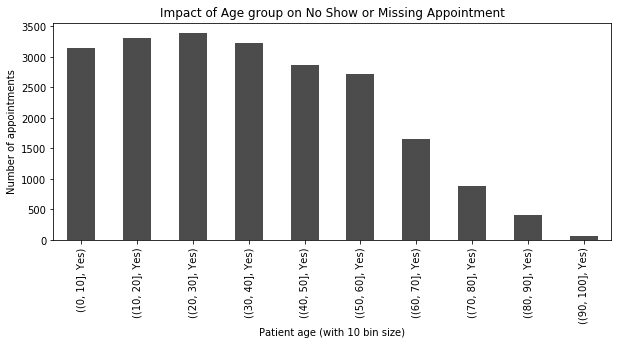

In [313]:
# plot a graph of no-shown as a function of age
no_shown_age_data.plot(kind='bar', figsize=(10,4), color='k',alpha=0.7);
plt.title('Impact of Age group on No Show or Missing Appointment')
plt.xlabel('Patient age (with 10 bin size)')
plt.ylabel('Number of appointments')

In [314]:
# filter by shown appointments
shown_age_data = df.query('no_show == "No"').groupby('age_bins').no_show.value_counts()
shown_age_data

age_bins   no_show
(0, 10]    No         12061
(10, 20]   No          9791
(20, 30]   No         10389
(30, 40]   No         11820
(40, 50]   No         11550
(50, 60]   No         12940
(60, 70]   No          9541
(70, 80]   No          4832
(80, 90]   No          2137
(90, 100]  No           238
Name: no_show, dtype: int64

In [315]:
age_show_up = {}
for index in range(0,len(age_bins)-1):
    key = "({},{}]".format(age_bins[index], age_bins[index+1])
    value = shown_age_data.values[index]
    age_show_up.update({key: value})
age_show_up

{'(0,10]': 12061,
 '(10,20]': 9791,
 '(20,30]': 10389,
 '(30,40]': 11820,
 '(40,50]': 11550,
 '(50,60]': 12940,
 '(60,70]': 9541,
 '(70,80]': 4832,
 '(80,90]': 2137,
 '(90,100]': 238}

In [316]:
# calculate percentage by age_bins of shown
def print_shown_age_percent():
    total = len(df.index)
    for key, value in age_show_up.items():
        percent = (value/total) * 100
        print("{}% are in bin-{}".format(percent.round(2), key))
print_shown_age_percent()

11.28% are in bin-(0,10]
9.15% are in bin-(10,20]
9.71% are in bin-(20,30]
11.05% are in bin-(30,40]
10.8% are in bin-(40,50]
12.1% are in bin-(50,60]
8.92% are in bin-(60,70]
4.52% are in bin-(70,80]
2.0% are in bin-(80,90]
0.22% are in bin-(90,100]


Text(0, 0.5, 'Number of appointments')

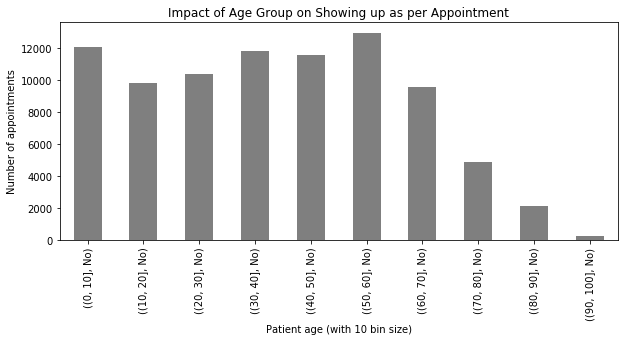

In [317]:
# plot a graph of shows as a function of age
shown_age_data.plot(kind='bar', figsize=(10,4), color="k",alpha=0.5);
plt.title('Impact of Age Group on Showing up as per Appointment')
plt.xlabel('Patient age (with 10 bin size)')
plt.ylabel('Number of appointments')

#### Inference:
Showing up to appointment were declining from age group 0-10 to 10-20 and then improved till age group of 50-60 and then decreased consistently till age bin 90-100.
Not Showing up was increasing till age group 20-30 and then started to decline consistently till age group 90-100.

#### Question 3.How likely are the patients to turn up as per their appointment if they are alcoholic, Diabetic,Handicap or suffering from Hypertension?

Alcoholic:

In [318]:
alcoholic = df.groupby('alcoholism').no_show.value_counts()
alcoholic

alcoholism  no_show
0           No         82616
            Yes        20995
1           No          2683
            Yes          677
Name: no_show, dtype: int64

Text(0.5, 1.0, 'Pie chart for alcoholism impacting Patient showing up to appointment or not')

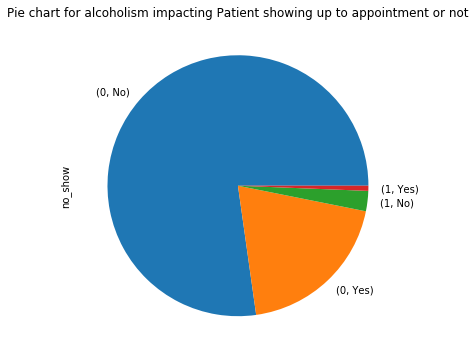

In [319]:
alcoholic.plot.pie(subplots = True ,figsize=(6,6));
plt.title('Pie chart for alcoholism impacting Patient showing up to appointment or not')

#### Inference:
1. Majority of our patients are Non alcoholics i.e 1,03,611 and the number of Alcoholics are 3360.
2. Of the Non Alcoholic patients ,82616(80%) visited Hospital as per appointment and 20995(20%) did not make to the Hospital against appointment.
3. Of the Alcoholic Patients ,2683(80%) visited Hospital as per appointment and 677(20%) did not make to the Hospital.
4. Alcoholism variable is not carrying any important information pertaining to showing up to appointment or not.

Diabetic:

In [320]:
diabetic = df.groupby('diabetes').no_show.value_counts()
diabetic

diabetes  no_show
0         No         78786
          Yes        20242
1         No          6513
          Yes         1430
Name: no_show, dtype: int64

Text(0.5, 1.0, 'Diabetic vs Showing up')

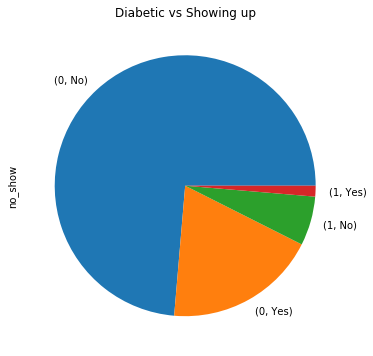

In [321]:
diabetic.plot.pie(figsize=(6,6))
plt.title('Diabetic vs Showing up')

#### Inference:
1. The Data provided to us comprises of 99028 non diabetic patients . Of them 78786 (80%) visited Hospital as per appointment and 20242(20%) did not visit Hospital as per appointment.
2. 7643 are Diabetic Patients and 6213 visited Hospital and 1430 did not visit.


Handicap:

In [322]:
handicap = df.groupby('handicap').no_show.value_counts()
handicap

handicap  no_show
0         No         83469
          Yes        21270
1         No          1672
          Yes          361
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: no_show, dtype: int64

Text(0.5, 1.0, 'Handicap vs Showing up')

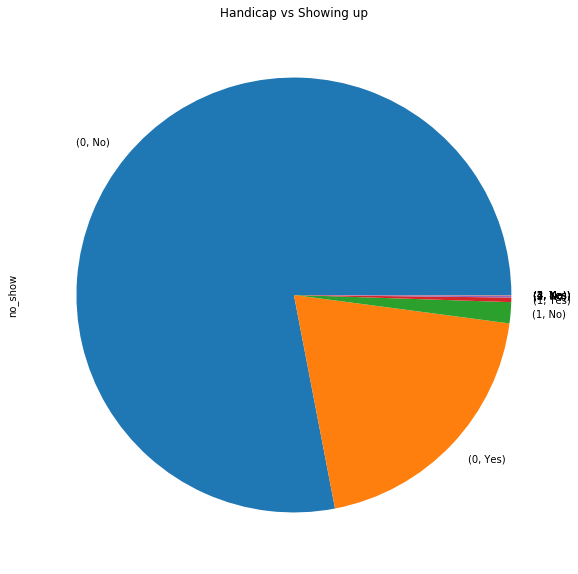

In [323]:
handicap.plot.pie(figsize=(10,10))
plt.title("Handicap vs Showing up")

#### Inference:
1. Patients are classified into 5 classes on the level of Handicap they are.
2. Of the total 106971 Patients , 104739 are in handicap class 0 where 83469 reported to hospital as per appointment and 21270 did not make to Hospital.
3. 2033 are in class 1 where 1672 reported to hospital and 361 did not report,
4. 183 are in class 2 where 146 reported to hospital and 37 did not report,
5. 13 are in class 3 where 10 reported and 3 did not,
6. 3 are in class 4 where 2 reported and 1 did not. 

In [324]:
hypertension = df.groupby('hypertension').no_show.value_counts()
hypertension

hypertension  no_show
0             No         67271
              Yes        17900
1             No         18028
              Yes         3772
Name: no_show, dtype: int64

Text(0.5, 1.0, 'Hypertension vs Showing up')

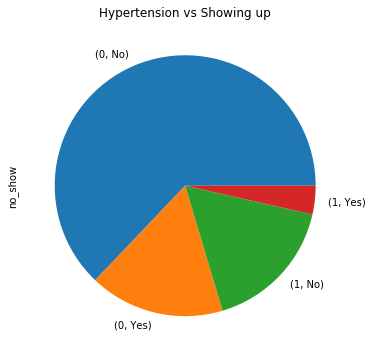

In [325]:
hypertension.plot.pie(figsize=(6,6))
plt.title("Hypertension vs Showing up")

#### Inference:
1. Of the total number of Patients, 85171(80%) are not suffering from Hyper tension and 21800(20%) are suffering from Hyper tension.
2. Of the non Hyper tension Patients 67271(78%) visited hospital as per appointment and 17900(22%) are flagged as Yes which means did not report.
3. Of the Hyper tension Patients 18028(82%) reported to hospital and 3772(18%) didnot make up to Hospital.

Our Target Variable No_show is not being much influenced by Independent variables Diabetic,Hypertension,Alcoholism or Handicap.
If we are predicting target class value using Machine Learning Classification Models , with the provided data we can go for dimensionality reduction of the mentioned Variables.

### 4.Which neighborhoods have a highest number of People making it as per their Appointment?

In [326]:
no_shows = df.query('no_show == "Yes"').groupby('neighborhood').no_show.count()
no_shows.sort_values(ascending=False, inplace=True)

Text(0, 0.5, 'Number of appointments')

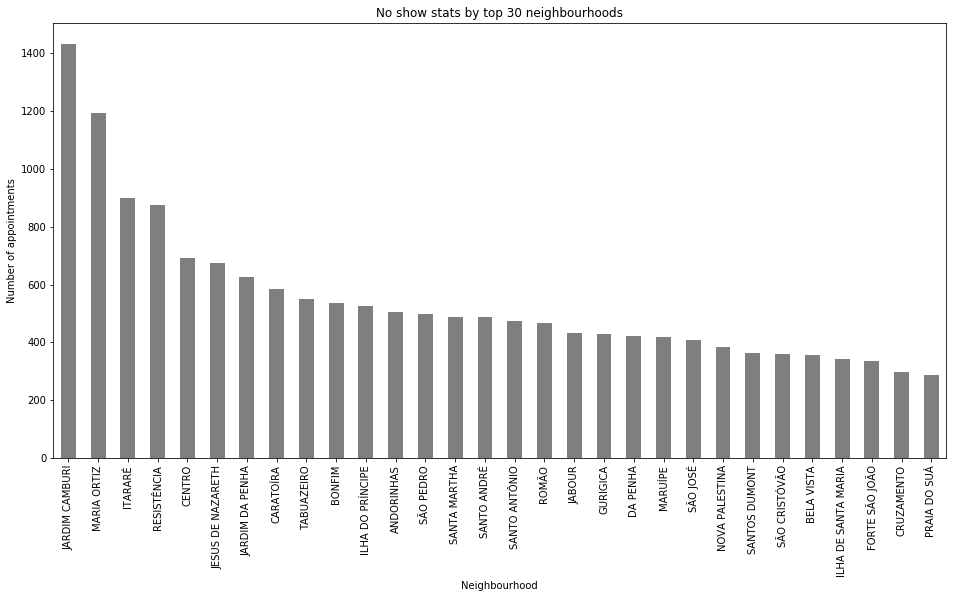

In [327]:
# plotting the data of top 30 neighbourhoods so that count of them can be seen clearly
values = no_shows[:30]
labels = no_shows.index[:30]
values.plot(kind="bar", x=labels, figsize=(16,8), color="k",alpha=0.5)
plt.title("No show stats by top 30 neighbourhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of appointments")

Text(0, 0.5, 'Number of appointments')

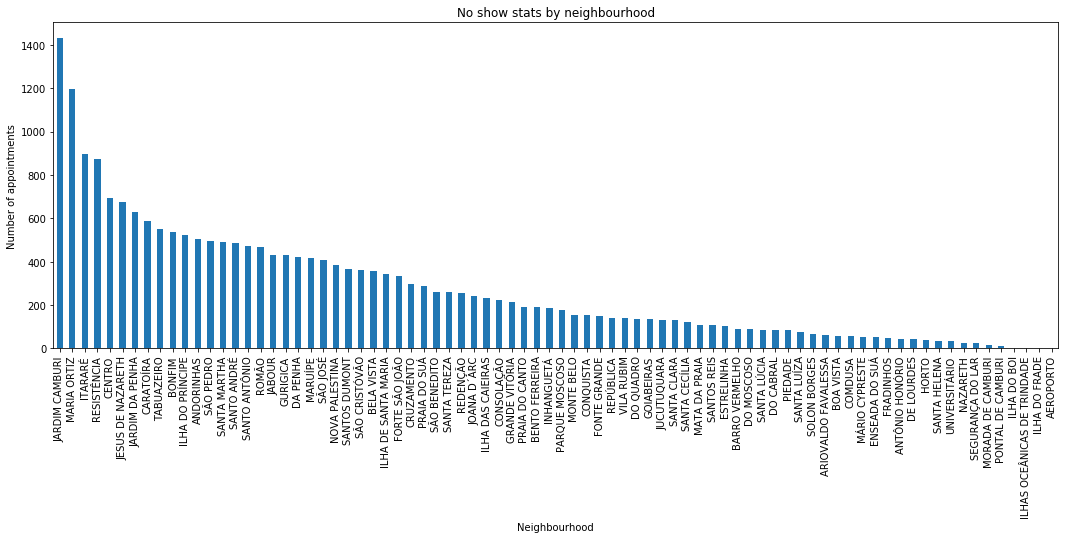

In [328]:
#Bar plot for all the values of No-shows
labels = no_shows.index
no_shows.plot(kind="bar", x=labels, figsize=(18,6), color="#2077B4")
plt.title("No show stats by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of appointments")

In [329]:
shows = df.query('no_show == "No"').groupby('neighborhood').no_show.count()
shows.sort_values(ascending=False, inplace=True)

Text(0, 0.5, 'Number of appointments')

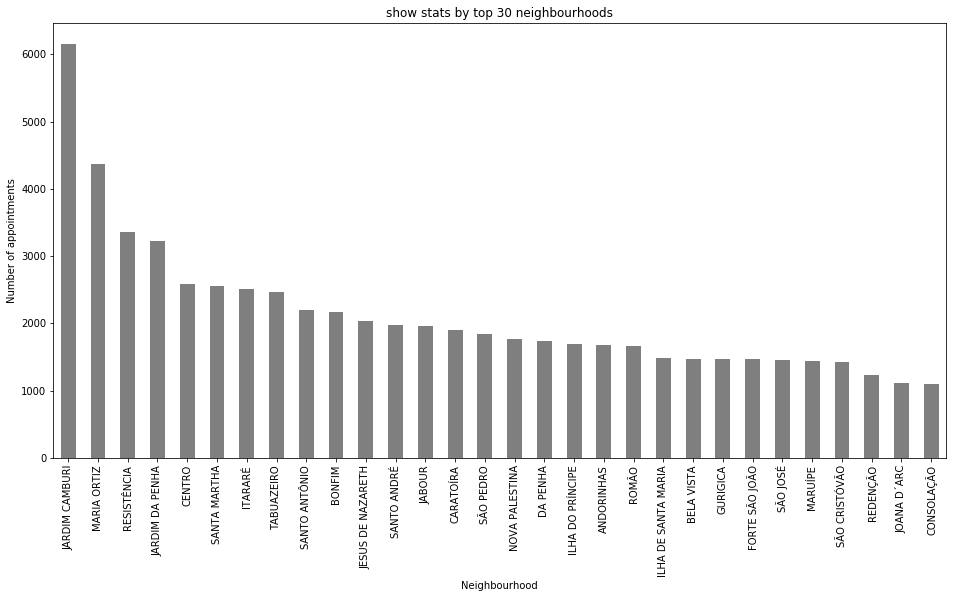

In [330]:
# plotting the data of top 30 neighbourhoods so that count of them can be seen clearly
values = shows[:30]
labels = shows.index[:30]
values.plot(kind="bar", x=labels, figsize=(16,8), color="k",alpha=0.5)
plt.title("show stats by top 30 neighbourhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of appointments")

Text(0, 0.5, 'Number of appointments')

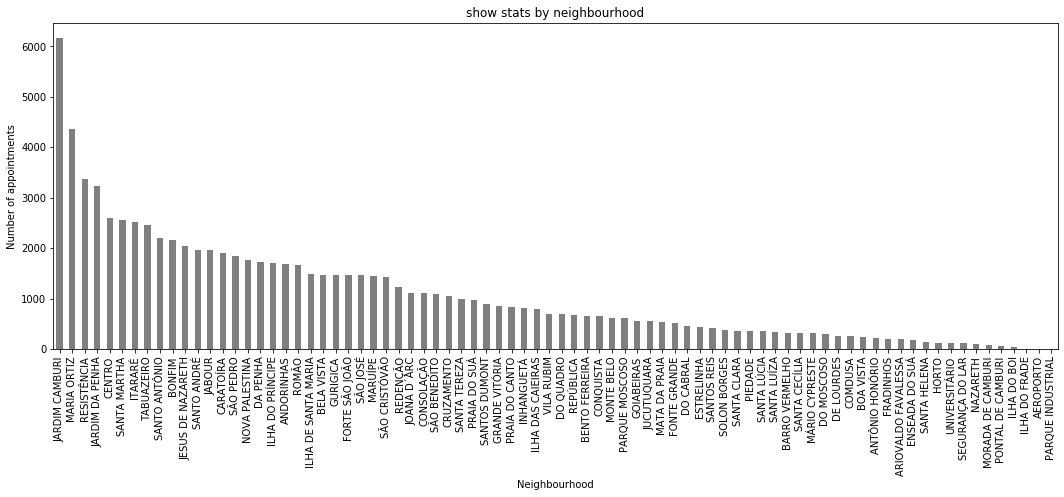

In [331]:
#Bar plot for all the values of No-shows
labels = shows.index
shows.plot(kind="bar", x=labels, figsize=(18,6), color="k",alpha=0.5)
plt.title("show stats by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of appointments")

In [332]:
no_shows

neighborhood
JARDIM CAMBURI                 1432
MARIA ORTIZ                    1194
ITARARÉ                         898
RESISTÊNCIA                     874
CENTRO                          692
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: no_show, Length: 80, dtype: int64

In [333]:
shows

neighborhood
JARDIM CAMBURI       6154
MARIA ORTIZ          4368
RESISTÊNCIA          3360
JARDIM DA PENHA      3224
CENTRO               2590
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: no_show, Length: 80, dtype: int64

#### Inference:
From the plots it can be observed that neighborhood has 81 unique values and also our target variable no_show is hugely impacted by neighborhood .
It can be observed that few localities have huge skipping of visiting of Hospital as per appointment and Few are visiting Hospital as per the schedule.

### 5.If the Patient is covered under Welfare aka Scholarship , how likely they are to miss their appointment?

In [204]:
welfare = df.groupby('scholarship').no_show.value_counts()
welfare

scholarship  no_show
0            No         77061
             Yes        19101
1            No          8238
             Yes         2571
Name: no_show, dtype: int64

Text(0.5, 1.0, 'Welfare vs Noshow Up')

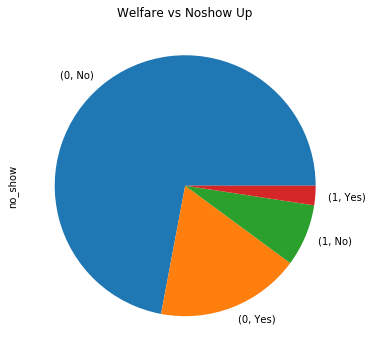

In [207]:
welfare.plot.pie(figsize=(8,6));
plt.title("Welfare vs Noshow Up")

#### Inference:
1. Of the total Patients, 96162(90%) are not under welfare and 10809(10%) are under Welfare.
2. 77061(80%) Patients who are not under Welfare did not miss appointment and 19101 (20%) patients who are not under Welfare had skipped visiting against appointment.
3. 8238 (76%) Patients who are not under Welfare did not miss appointment and 2571 (24%) patients who are not under Welfare had skipped visiting against appointment.

### 6.How wait_days affecting No show up?

In [334]:
df.wait_days.nunique()

129

In [335]:
print(sorted(df.wait_days.unique()), end=' ')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179] 

In [336]:
no = df.query('no_show == "No"')
yes = df.query('no_show == "Yes"')


In [337]:
no.shape , yes.shape

((85299, 16), (21672, 16))

In [338]:
no_value = no[['no_show', 'wait_days']].groupby('wait_days').count()

In [339]:
no_value

,no_show
wait_days,
0,35411
1,3951
2,5051
3,2016
4,4003
...,...
155,4
162,9
169,7


Text(0, 0.5, 'Number of appointments')

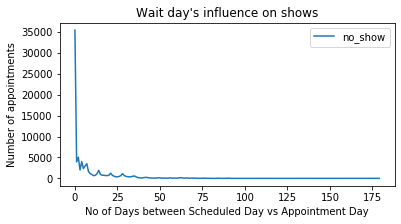

In [340]:
no_value.plot(kind='line', figsize=(6,3))
plt.title("Wait day's influence on shows")
plt.xlabel('No of Days between Scheduled Day vs Appointment Day')
plt.ylabel('Number of appointments')

In [341]:
yes_value = yes[['no_show', 'wait_days']].groupby('wait_days').count()

In [342]:
yes_value

,no_show
wait_days,
0,1741
1,1075
2,1584
3,621
4,1209
...,...
155,6
162,2
169,1


Text(0, 0.5, 'Number of appointments')

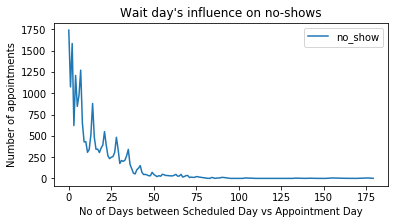

In [343]:
yes_value.plot(kind='line', figsize=(6,3))
plt.title("Wait day's influence on no-shows")
plt.xlabel('No of Days between Scheduled Day vs Appointment Day')
plt.ylabel('Number of appointments')

### Inference:
Patients are more likely to make to their appointment if the schedule date and appointment date fall on same day aka wait_days being 0. The curve seemed to flatten after reaching 50 days.

### 7.How likely a Patient  to visit Hospital as per their appointment when SMS is received?

In [344]:
# group by sms_received and count the shows and no shows
sms = df.groupby('sms_received').no_show.value_counts()
sms

sms_received  no_show
0             No         60284
              Yes        12104
1             No         25015
              Yes         9568
Name: no_show, dtype: int64

In [345]:
print('The number of people who received sms is :{} , of them {},people visited as per appointment and {} skipped the appointment.'.format(60284+12104,60284,12104))
print('The number of people who did not receive sms is : {}, people visited as per appointment are {},people who skipped appointment are {}'.format(25015+9568,25015,9568))

The number of people who received sms is :72388 , of them 60284,people visited as per appointment and 12104 skipped the appointment.
The number of people who did not receive sms is : 34583, people visited as per appointment are 25015,people who skipped appointment are 9568


Text(0, 0.5, 'Number of appointments')

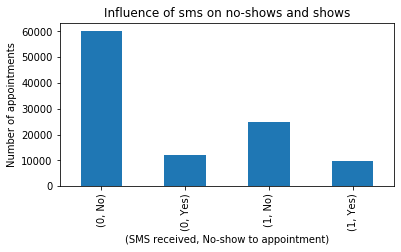

In [346]:
# plot the graph
sms.plot(kind='bar',figsize=(6,3))
plt.title('Influence of sms on no-shows and shows')
plt.xlabel('(SMS received, No-show to appointment)')
plt.ylabel('Number of appointments')

#### Inference:
1. The number of people who received sms is :72388(67%) , of them 60284(83%),people visited as per appointment and 12104(17%) skipped the appointment.
2. The number of people who did not receive sms is : 34583(32%), people visited as per appointment are 25015(72%),people who skipped appointment are 9568(28%).

# Final report:
1. The total number of records aka appointments 106971, 85299 visited hospital as per appointment and 21672 could not make it to their appointment.
2. At an average each Patient has made 1.77 appointments in the data.
3. Variables Age , Gender , Scholarship , Hypertension , Diabetes , Alcoholism , Handi cap are not carrying much information for predicting Target class no_show.
4. Neighborhood is the variable driving Target class hugely.
5. Wait days also impacting No-show .
6. SMS received is making more Patients to visit hospital as per appointment.